# Example EDX analysis <br>
## author: Chris Allen <br> 
<br>

In [2]:
%matplotlib notebook

In [3]:
import hyperspy.api as hs
hs.preferences.GUIs.warn_if_guis_are_missing = False
hs.preferences.save()
import os
from hyperspy.drawing._widgets.scalebar import ScaleBar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patheffects as patheffects
import matplotlib
import matplotlib.patches as patches

from IPython.display import HTML, display

import ParticleSpy.api as ps

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings("ignore")
#def hide_code():
display(HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>'''))

#hide_code()


In [4]:
#make pretty plots
def pretty_fig(hs_object, loc = 4, scale_bar_size = 10, font_size = 12, scale_bar_height = 4, scale_bar_color = 'white', pad = 0.1,  axis_on = False, scale_bar_units = 'nm' ):
    '''
    loc : int
    Location of this size bar. Valid location codes are:
    'upper right'  : 1,
    'upper left'   : 2,
    'lower left'   : 3,
    'lower right'  : 4,
    'right'        : 5,
    'center left'  : 6,
    'center right' : 7,
    'lower center' : 8,
    'upper center' : 9,
    'center'       : 10
    '''
    #create figure
    fig = plt.figure(figsize=(4, 4))  # in inches
    ax = plt.axes()
    #plot
    this_plot = ax.imshow(
        hs_object.data)#, 
        #interpolation='nearest',
        #origin='upper', 
        #extent=hs_object.axes_manager.signal_extent)
    
    if axis_on == False:
        #turn off axis
        plt.axis('off')
        
    #get px size 
    scale_bar_px = round(scale_bar_size / hs_object.axes_manager['x'].scale)
    
    #get units
    dat_scale_bar_units = hs_object.axes_manager['x'].units
    
    factor = {'um':1000,'µm' : 1000, 'nm':1 }
    scale = factor[dat_scale_bar_units] /  factor[scale_bar_units]

    
    # Make scalebar on the image
    fontprops = fm.FontProperties(size=font_size)
    scalebar0 = AnchoredSizeBar(
            ax.transData,
            scale_bar_px/ scale, 
            str(scale_bar_size ) + ' ' + scale_bar_units,
            loc,
            pad=pad,
            color=scale_bar_color,
            frameon=False,
            label_top=True,
            size_vertical=scale_bar_height,
            fontproperties=fontprops)

    # The next line is needed due to a bug in matplotlib 2.0
    scalebar0.size_bar.get_children()[0].fill = True
    ax.add_artist(scalebar0)
    
    #plt.tight_layout(True)
    return fig, ax

In [31]:
#load dm4 files into a stack
visit_path = '/dls/science/groups/e02'
data_path = visit_path + '/Sample_data/sample_EELS_EDS_new'
#fig_save_path = visit_path + '/processing/figures'
#if not os.path.exists(fig_save_path):
#   os.makedirs(fig_save_path)

si = hs.load(data_path + '/*.dm4', stack = False)
si

[<EDSTEMSpectrum, title: EDS Spectrum Image, dimensions: (94, 91|2048)>,
 <EELSSpectrum, title: EELS Spectrum Image (high-loss), dimensions: (94, 91|2048)>,
 <EELSSpectrum, title: EELS Spectrum Image (low-loss), dimensions: (94, 91|2048)>,
 <Signal2D, title: HAADF Image (SI Survey), dimensions: (|512, 512)>,
 <Signal2D, title: HAADF Image, dimensions: (|94, 91)>]

### EDX analysis

<IPython.core.display.Javascript object>


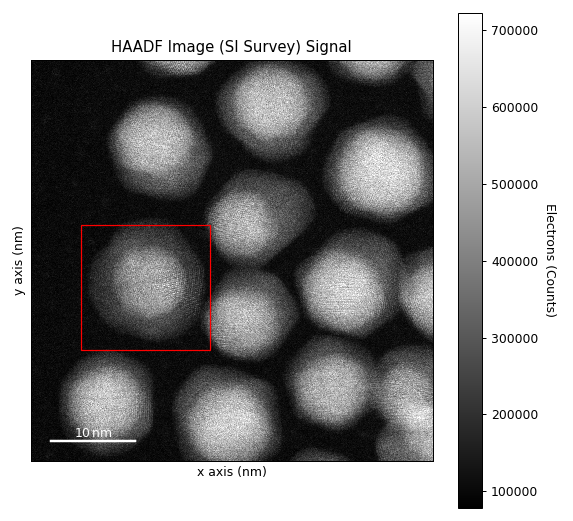

In [47]:
#survey_fig = si[3].plot()
#get SI region
si_area = si[4].original_metadata['ImageList']['TagGroup0']['ImageTags']['SI']['Acquisition']['Survey Image']['Spectrum Image Rect']
#print(si_area)
#convert from px to nm|
si_area = tuple([si[3].axes_manager['x'].scale*x for x in si_area])
#print(si_area)
#define marker on survey scan
m = hs.plot.markers.rectangle(x1= si_area[1], y1=si_area[0], x2=si_area[3], y2=si_area[2],
                                color='red')
survey_fig = si[3].plot()
#add marker
si[3].add_marker(m)
#plt.draw()
plt.show()
#roi = hs.roi.RectangularROI( si_area[0], si_area[1],  si_area[2], si_area[3])
#rec_roi = roi.interactive(si[3])

<IPython.core.display.Javascript object>


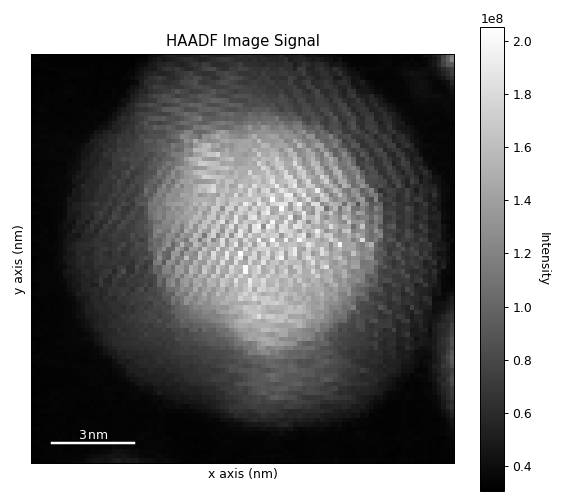

In [48]:
SI_fig = si[4].plot()
#si

<IPython.core.display.Javascript object>


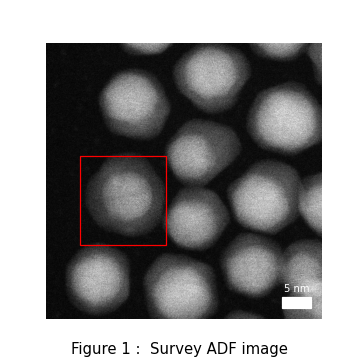

In [51]:
#create images to save
fig1, ax1 = pretty_fig(si[3], scale_bar_size = 5, pad = 1, font_size = 8, scale_bar_height = 20, scale_bar_color = 'white' )
#add SI region
si_area = si[4].original_metadata['ImageList']['TagGroup0']['ImageTags']['SI']['Acquisition']['Survey Image']['Spectrum Image Rect']
si_area_wh = si_area[2] - si_area[0], si_area[3] - si_area[1]

# Create a Rectangle patch
rect = patches.Rectangle((si_area[1],si_area[0]),si_area_wh[0],si_area_wh[1],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax1.add_patch(rect)
#plt.tight_layout(False)
fig1_caption="Figure 1 :  Survey ADF image"
txt = plt.figtext(0.5, 0.01, fig1_caption, wrap=True, horizontalalignment='center', fontsize=12)
#plt.tight_layout(True)
plt.show()

#save
#plt.savefig(fig_save_path + '/survey.png', dpi = 300)



Nano-particles generally clustered and approximately cubiod but significant breakdown seen under the beam

<IPython.core.display.Javascript object>


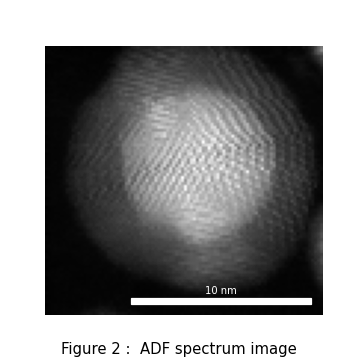

In [52]:
#SI ADF image
fig2, ax2 = pretty_fig(si[4], scale_bar_size = 10, pad = 1, font_size = 8, scale_bar_height = 2, scale_bar_color = 'white' )
fig2_caption="Figure 2 :  ADF spectrum image"
txt = plt.figtext(0.5, 0.01, fig2_caption, wrap=True, horizontalalignment='center', fontsize=12)
#plt.savefig(fig_save_path + '/SI.png', dpi = 300)

<IPython.core.display.Javascript object>


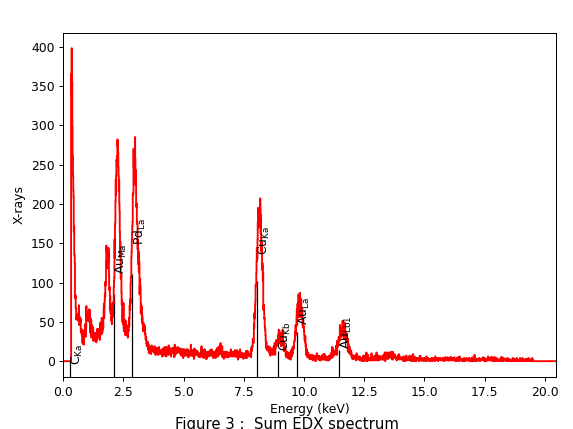

In [61]:
#look at edx sum image
si[0].set_elements([])
si[0].set_lines([])
elements = ['C','Au', 'Pd','Cu']
si[0].add_elements(elements)

si[0].add_lines()
si[0].add_lines(['Cu_Kb', 'Au_Ma', 'Au_Lb1'])
si[0].sum().plot(True)
ax_spec = plt.gca()
#ax_spec.set_ylim([-100,2700])
#ax_spec.set_xlim([-0.1, 15])
ax_spec.set_title('')
plt.xlabel('Energy (keV)')
fig3_caption="Figure 3 :  Sum EDX spectrum"
txt = plt.figtext(0.5, 0.000, fig3_caption, wrap=True, horizontalalignment='center', fontsize=12)
#plt.savefig(fig_save_path + '/sum_spec.png', dpi = 300)

In [63]:
#identify peaks
hs.eds.get_xray_lines_near_energy(1.65, only_lines=['a','b'])

['Hf_Ma',
 'Kr_Lb1',
 'Lu_Mb',
 'Rb_La',
 'Hf_Mb',
 'Ta_Ma',
 'Kr_La',
 'Lu_Ma',
 'Yb_Mb',
 'Si_Ka',
 'Al_Kb']

<IPython.core.display.Javascript object>


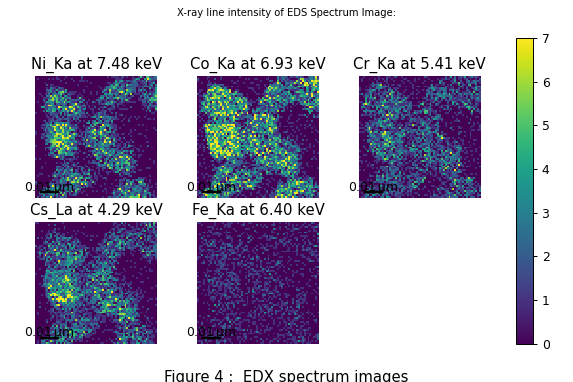

[2, 2, 2, 2, 2]


In [20]:
eds_maps = si[0].get_lines_intensity(['Ni_Ka', 'Co_Ka', 'Cr_Ka', 'Cs_La', 'Fe_Ka']);

hs.plot.plot_images(eds_maps, axes_decor = 'off', scalebar = 'all',
    tight_layout=True, cmap=  'viridis',
    colorbar='single', saturated_pixels=2, 
    scalebar_color='black', suptitle_fontsize=8,
    padding={'top':0.8, 'bottom':0.10, 'left':0.05,
            'right':0.85, 'wspace':0.20, 'hspace':0.20});

ax_maps = plt.gca();
#ax_maps.set_title('')
fig4_caption="Figure 4 :  EDX spectrum images";
txt = plt.figtext(0.5, 0.000, fig4_caption, wrap=True, horizontalalignment='center', fontsize=12);
#plt.savefig(fig_save_path + '/spec_maps.png', dpi = 300)


EDX spectrum images show no obvious core, shell structure. 

<IPython.core.display.Javascript object>


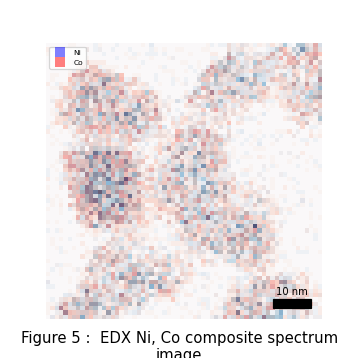

In [22]:
##color overlays using pretty figure function - need to run twice to get white background for some reason...
fig_ol2, ax_ol2 = pretty_fig(eds_maps[0], scale_bar_size = 10, pad = 1, font_size = 8, scale_bar_height = 2, scale_bar_color = 'black' )
plt.set_cmap('Blues')
plt.imshow(eds_maps[1].data, cmap= 'Reds', alpha = 0.4)


#from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0],marker = 's',  color='b',markerfacecolor='b',
                          alpha = 0.5, label='Ni', markersize=8, markeredgewidth=0.0, linestyle="None"),
                   Line2D([0], [0], marker='s', color='r', label='Co',alpha = 0.5,
                          markerfacecolor='r', markersize=8, markeredgewidth=0.0, linestyle="None")]


ax_ol2.legend(handles=legend_elements, loc=2, prop={'size': 6})
fig5_caption="Figure 5 :  EDX Ni, Co composite spectrum image"
txt = plt.figtext(0.5, 0.000, fig5_caption, wrap=True, horizontalalignment='center', fontsize=12)
#plt.savefig(fig_save_path + '/edx_Ni_Co.png', dpi = 300)


In [25]:
#list energies
#hs.material.elements.Zn.Atomic_properties.Xray_lines

### Principle component analysis
Attempt PCA to extract distinct phases

<IPython.core.display.Javascript object>


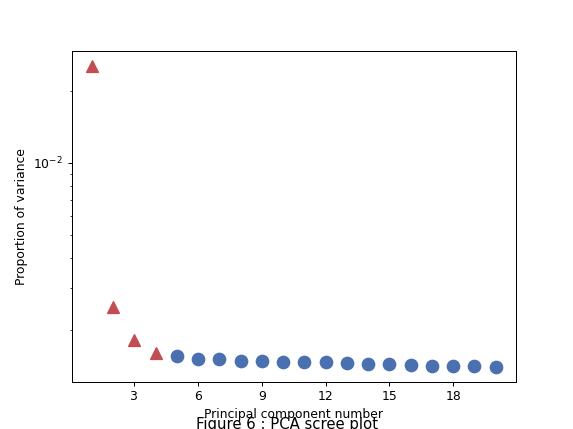

In [23]:
#Particles should be triple shell outer CsNiCr, mid CsNiCo, inner CsCoCr
#['Ni_Ka', 'Co_Ka', 'Cr_Ka', 'Cs_La', 'Fe_Ka']
si[0].change_dtype('float')
hs.material.elements.Fe.Atomic_properties.Xray_lines

si[0].decomposition()#True, algorithm='nmf', output_dimension=3)
ax_vr= si[0].plot_explained_variance_ratio(n=20,
                                    threshold=4,
                                   xaxis_type='number')
#plt.savefig(fig_save_path + '/scree.png', dpi = 300)
plt.title('')
fig6_caption="Figure 6 : PCA scree plot"
txt = plt.figtext(0.5, 0.000, fig6_caption, wrap=True, horizontalalignment='center', fontsize=12)





<IPython.core.display.Javascript object>


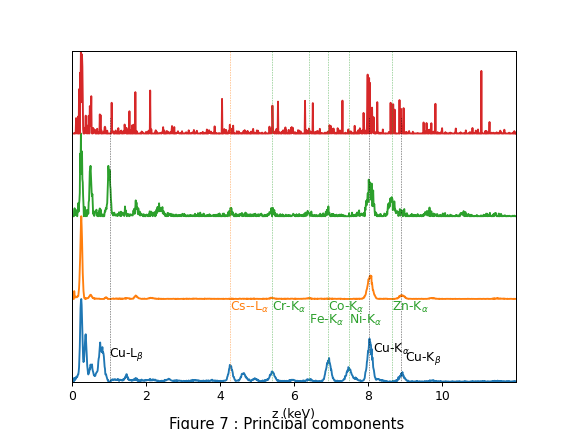

In [24]:
# use non-negative matrix factorization
si[0].decomposition(True, algorithm='nmf', output_dimension=4)#'RPCA_GoDec''nmf'
factors = si[0].get_decomposition_factors()

# the first factor is a very strong carbon background component, so we
# normalize factor intensities for easier qualitative comparison


for f in factors:
   f.data /= f.data.max()

loadings = si[0].get_decomposition_loadings()

hs.plot.plot_spectra(factors.isig[:12.0], style='cascade')#padding=-1)
# add some lines to nicely label the peak positions
plt.axvline(7.4781, c='C2', ls=':', lw=0.5)
plt.text(x=7.4781, y=0.70, s='Ni-K$_\\alpha$', color='C2')
plt.axvline(6.93, c='C2', ls=':', lw=0.5)
plt.text(x=6.93, y=0.85, s='Co-K$_\\alpha$', color='C2')
plt.axvline(5.4147, c='C2', ls=':', lw=0.5)
plt.text(x=5.4147, y=0.85, s='Cr-K$_\\alpha$', color='C2')
plt.axvline(6.4039, c='C2', ls=':', lw=0.5)
plt.text(x=6.4039, y=0.70, s='Fe-K$_\\alpha$', color='C2')
plt.axvline(8.639, c='C2', ls=':', lw=0.5)
plt.text(x=8.639, y=0.85, s='Zn-K$_\\alpha$', color='C2')

plt.axvline(4.2864, c='C1', ls=':', lw=0.5)
plt.text(x=4.2864, y=0.85, s='Cs--L$_\\alpha$', color='C1')

plt.axvline(8.040, ymax=0.8, c='k', ls=':', lw=0.5)
plt.text(x=8.14, y=0.35, s='Cu-K$_\\alpha$', color='k')
plt.axvline(8.9, ymax=0.8, c='k', ls=':', lw=0.5)
plt.text(x= 9.0, y=0.25, s='Cu-K$_\\beta$', color='k')
plt.axvline(1.022, ymax=0.8, c='k', ls=':', lw=0.5)
plt.text(x= 1.0, y=0.30, s='Cu-L$_\\beta$', color='k')

fig7_caption="Figure 7 : Principal components"
txt = plt.figtext(0.5, 0.000, fig7_caption, wrap=True, horizontalalignment='center', fontsize=12)

#plt.savefig(fig_save_path + '/components_spec.png', dpi = 300)

Figure 7 shows the principle components of the spectrum image as determined using a non-negative matrix factorization. The fact that we see two predominantly Cu compunents and one mixed Co, Cs, Cr, Ni suggests there is not significant shell structure. 

<IPython.core.display.Javascript object>


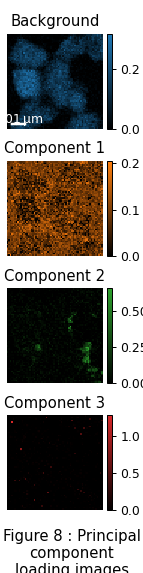

In [25]:
hs.plot.plot_images(loadings, cmap='mpl_colors',
            axes_decor='off', per_row=1,
            label=['Background', 'Component 1', 'Component 2', 'Component 3'],
            scalebar=[0], scalebar_color='white',
            padding={'top': 0.95, 'bottom': 0.10,
                     'left': 0.05, 'right':0.78})

#plt.savefig(fig_save_path + '/components_img.png', dpi = 300)
fig8_caption="Figure 8 : Principal component loading images"
txt = plt.figtext(0.5, 0.000, fig8_caption, wrap=True, horizontalalignment='center', fontsize=12)
#ax_spec.set_ylim([-100,2700])
#ax_spec.set_xlim([-0.1, 15])

In [43]:
#attempt blind source separation
#si[0].blind_source_separation(3)
#si[0].plot_bss_results()

<IPython.core.display.Javascript object>


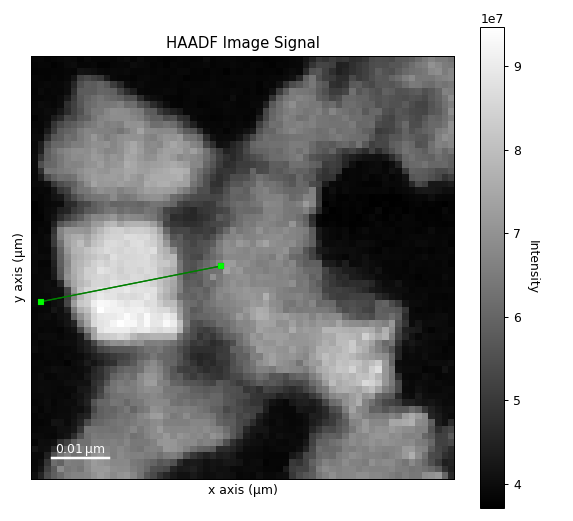

In [32]:
#linescan
ls_roi = hs.roi.Line2DROI(0, 0, 10, 10, linewidth =3)
#eds_maps[1].plot()
si[4].plot(cmap = 'gray')

this_line = ls_roi.interactive(si[4])#(eds_maps[1])
line_fig = plt.gcf()

#this_line.plot()

In [21]:
#line_fig.savefig(fig_save_path + '/edx_line_pos.png', dpi = 300)

In [22]:
#line_scans[0].axes_manager.signal_axes
#line_scans[0]

<IPython.core.display.Javascript object>


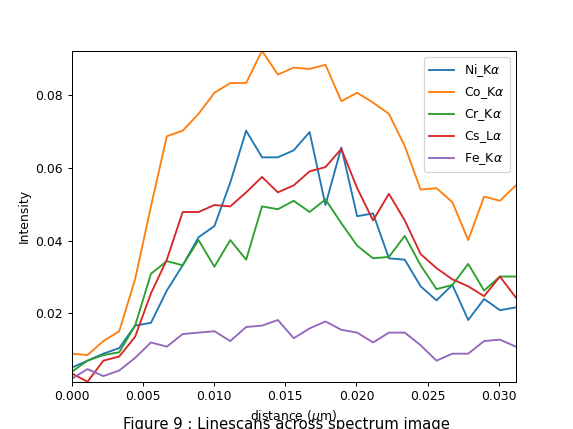

In [33]:
#plot all elements in list. 
#this_line.plot()
n = 0
line_scans = []
line_list = []
#element_str = eds_maps[n].metadata['Sample']['elements'][0]
for this_map in eds_maps:
    line_scans.append(ls_roi(this_map).as_signal1D(0))
    this_line = this_map.metadata['Sample']['x-ray_lines'][0]
    if this_line[-1] == 'a':
        this_line = this_line[:-1]  + '$\\alpha$'
    elif this_line[-1] == 'b':
        this_line = this_line[:-1]  + '$\\beta'
    else:
        continue
    line_list.append(this_line)
hs.plot.plot_spectra(line_scans, style = 'overlap')#, legend='auto')
plt.legend(line_list)

plt.xlabel('distance ($\mu$m)')
fig9_caption="Figure 9 : Linescans across spectrum image"
txt = plt.figtext(0.5, 0.000, fig9_caption, wrap=True, horizontalalignment='center', fontsize=12)
#plt.savefig(fig_save_path + '/edx_line_scans.png', dpi = 300)

Linescans suggest if anything the particles are Co and Cr rich at their surface.

In [257]:
### Radial averaging

In [258]:
#reload data
#si = hs.load(data_path + '/SI-023/*.dm4')
#binary_mask = hs.load('/dls/e01/data/2020/nt26559-1/processing/HAADF Image binary.tif')

In [259]:
#params = ps.parameters()
#params.generate(store_im=True,pad=1)
#params.generate_eds(elements=['Co','Cr','Cs','Ni'],store_maps=True)

In [260]:
#particles = ps.ParticleAnalysis([si[-1],si[0]],params,mask=binary_mask.data)

In [261]:
#i = 1 
#for this_particle in particles.list:
#    this_particle.image.plot()
#    plt.title('Particle ' + str(i) +' HAADF image')
#    plt.figure()
#    rp = ps.radial_profile(this_particle,['Co','Cr','Cs','Ni'],plot=True)
#    plt.title('Particle ' + str(i) +' radial profile')
#   i = i + 1
